# TASK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airbnb = pd.read_csv(r"inputs_categorical_test_2.csv")

In [4]:
airbnb.head(5)

,id,room_type,property_type,neighbourhood,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,bed_type,instant_bookable,cancellation_policy
0,58682,2,0,111.789678,0,0,1,0,1,1,1
1,87097,1,1,90.872207,1,1,1,1,1,0,2
2,177944,1,0,81.997831,1,0,1,1,1,0,2
3,185514,2,0,94.014330,0,0,1,0,1,1,1
4,214571,2,0,125.117595,1,0,1,0,1,0,2


In [5]:
airbnb.isnull().sum()
# checking nulls and no nulls are seen

id                        0
room_type                 0
property_type             0
neighbourhood             0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
bed_type                  0
instant_bookable          0
cancellation_policy       0
dtype: int64

In [9]:
airbnb.duplicated().sum()
# no duplicates in the data

0

In [12]:
airbnb.neighbourhood.describe()
# statistical values for the neighnbourhood prices.

count    1844.000000
mean       95.705584
std        12.710653
min        78.284070
25%        85.412309
50%        91.881868
75%        99.668276
max       125.117595
Name: neighbourhood, dtype: float64

# EXPLORATORY DATA ANALYSIS

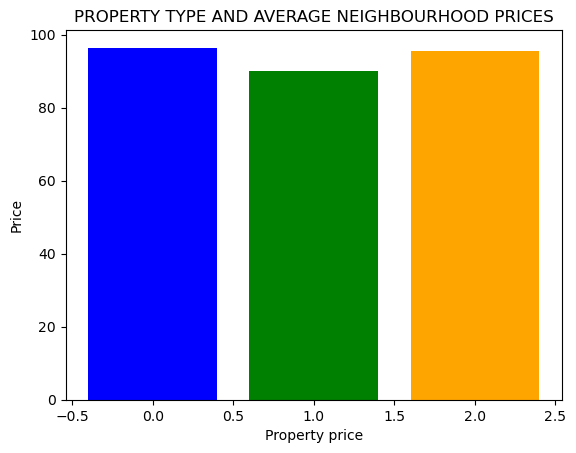

In [33]:
df1=pd.DataFrame(airbnb.groupby('property_type')['neighbourhood'].mean())
df1=df1.reset_index()
df1
plt.bar(x = df1.property_type, height=df1.neighbourhood, color = ['blue','green', 'orange'])
plt.title("PROPERTY TYPE AND AVERAGE NEIGHBOURHOOD PRICES")
plt.ylabel("Price")
plt.xlabel("Property price");

Considering 0 as least expensive and 1 as affordable and 2 as the expensive property

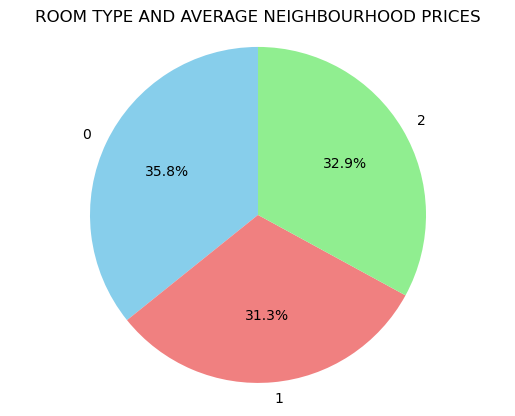

In [45]:
df2 = pd.DataFrame(airbnb.groupby('room_type')['neighbourhood'].mean()).reset_index()


colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
plt.pie(x=df2.neighbourhood, labels=df2.room_type, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("ROOM TYPE AND AVERAGE NEIGHBOURHOOD PRICES")
plt.axis('equal')  
plt.show()

lets consider room type as 0 being emtire room, 1 being private room and 2 being the shared room
it has been seen that 0 which is entire room has been booked more in numbers comparitively other two but the difference is not much

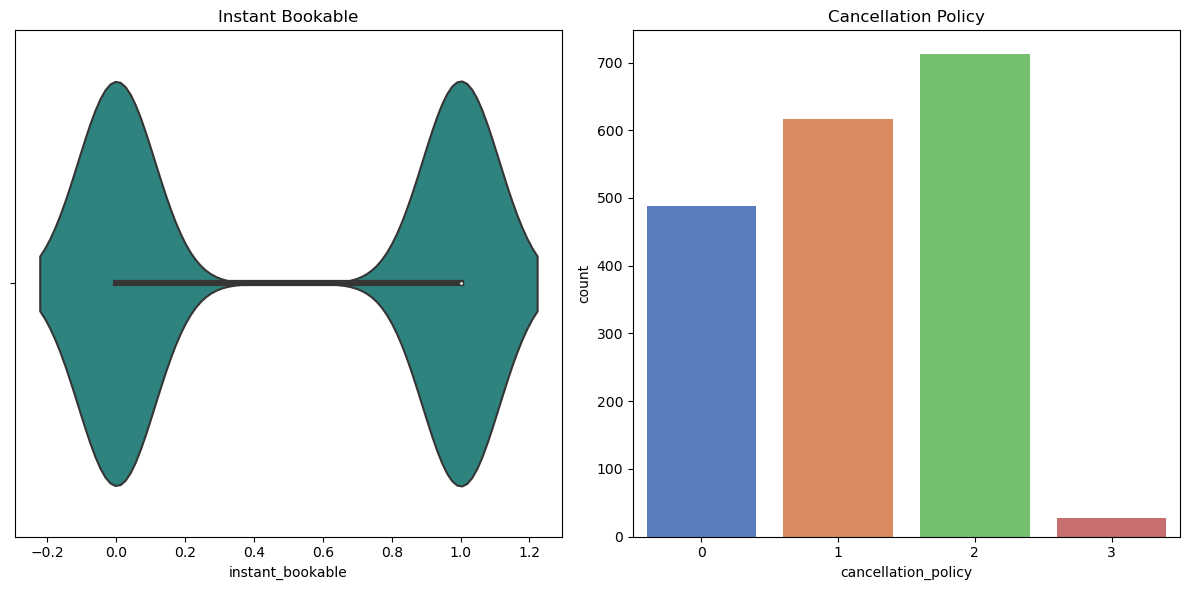

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='instant_bookable', data=airbnb, palette='viridis')
plt.title('Instant Bookable')
plt.subplot(1, 2, 2)
sns.countplot(x='cancellation_policy', data=airbnb, palette='muted')
plt.title('Cancellation Policy')
plt.tight_layout()
plt.show()

We can see that 0 which is cheap and 1 which is affordable has instant bookings more in numbers
But as they get instantly book it seems that they get instantly cancelled also.
In our second graph in the cancellation policy where guest can ceasily get refund even if they cancel it one day 
before are more in numbers these are flexible guests and 1 being the moderate guests and 0 being tye strict guests
3 rd one is a very rare and strict policy and thats why less in numbers.

# Correlation analysis

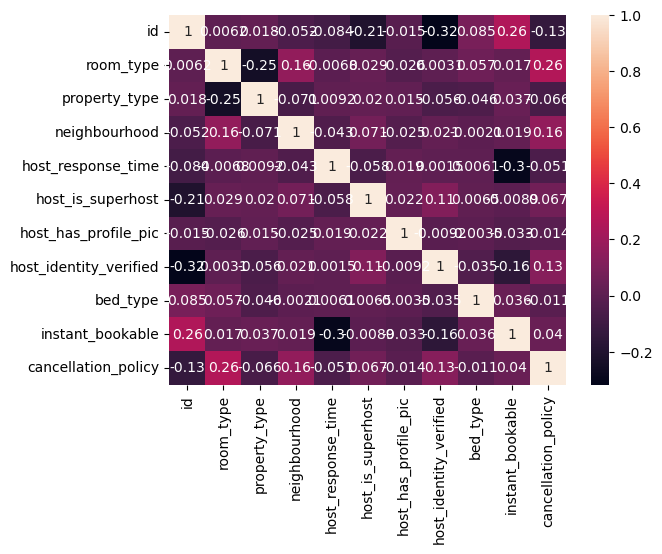

In [49]:
sns.heatmap(airbnb.corr(), annot=True);

By seeing the heatmap we can clearly see the co-relation between features with the ratio also. The highest co-relation denotes in lighter color and which has darker shade is have very low co-relation

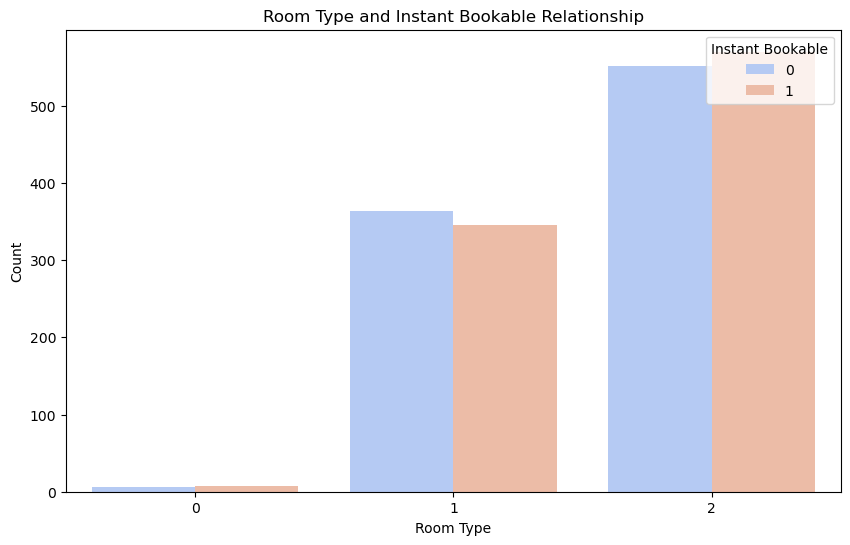

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a grouped bar plot for 'room_type' and 'instant_bookable'
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', hue='instant_bookable', data=airbnb, palette='coolwarm')
plt.title('Room Type and Instant Bookable Relationship')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Instant Bookable', loc='upper right')
plt.show()

we can see the relation between room type and booking so the 0 the entire room do not have intstant booking much, whereas shared rooms have the most instant booking and the second one which has instant booking is private room.

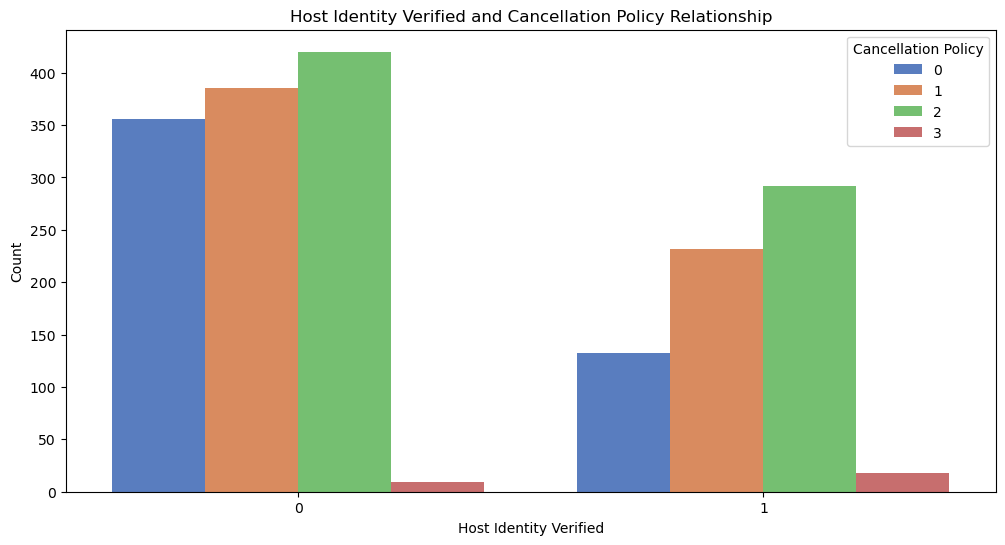

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='host_identity_verified', hue='cancellation_policy', data=airbnb, palette='muted')
plt.title('Host Identity Verified and Cancellation Policy Relationship')
plt.xlabel('Host Identity Verified')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Cancellation Policy', loc='upper right')

plt.show()

cancellation policy 0 being no has counted more in number that than the yes ones. Flexible customers did more cancellation that others and vice verca

0: Strict: Guests can receive a full refund if they cancel within 48 hours of booking and at least 14 days before the listing’s local check-in time. After 48 hours, the guest can cancel, but they won't receive a refund.
        1: Moderate: Guests can receive a full refund if they cancel at least 5 days before the listing’s local check-in time. If they cancel less than 5 days in advance, the first night is non-refundable, but the remaining nights will be refunded.
2: Flexible: Guests can receive a full refund if they cancel at least 1 day before the listing’s local check-in time. If they cancel less than 1 day in advance, the first night is non-refundable, but the remaining nights will be refunded.
        3: Super Strict (variations): This policy is less common and might have stricter conditions than the other policies. The specific conditions would be outlined in the host's listin

The analysis shows that the flixible people are the most active ones even in instant booking and cancellation of booking as well
also neibourhood prices do get affected by the room type and property type as seen in statistical analysis and heatmap above.